In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv('/Soccer_Football Clubs Ranking.csv')
df.head()

,ranking,club name,country,point score,1 year change,previous point scored,symbol change
0,88,1. FC Köln,Germany,1633,105,1545,+
1,74,1. FC Union Berlin,Germany,1655,5,1654,+
2,780,12 de Octubre de Itaugua,Paraguay,1377,70,1388,-
3,268,1º de Agosto,Angola,1513,13,1516,-
4,2525,1º de Maio,Angola,1218,22,1218,-


In [20]:
df = df.drop_duplicates()
df = df.dropna()
df.head()

,ranking,club name,country,point score,1 year change,previous point scored,symbol change
0,88,1. FC Köln,Germany,1633,105,1545,+
1,74,1. FC Union Berlin,Germany,1655,5,1654,+
2,780,12 de Octubre de Itaugua,Paraguay,1377,70,1388,-
3,268,1º de Agosto,Angola,1513,13,1516,-
4,2525,1º de Maio,Angola,1218,22,1218,-


In [6]:
df.columns

Index(['ranking', 'club name ', 'country', 'point score', '1 year change',
       'previous point scored', 'symbol change'],
      dtype='object')

In [15]:
G = nx.DiGraph()

for country in df['country'].unique():
    clubs = df[df['country'] == country]['club name '].tolist()
    for i in range(len(clubs)):
        for j in range(i + 1, len(clubs)):
            G.add_edge(clubs[i], clubs[j])

             Club  Degree Centrality  PageRank  Betweenness Centrality
0  Shooting Stars           0.033626  0.000860                0.000087
1     Racing Club           0.024488  0.000571                0.000051
2     River Plate           0.024488  0.000735                0.000043


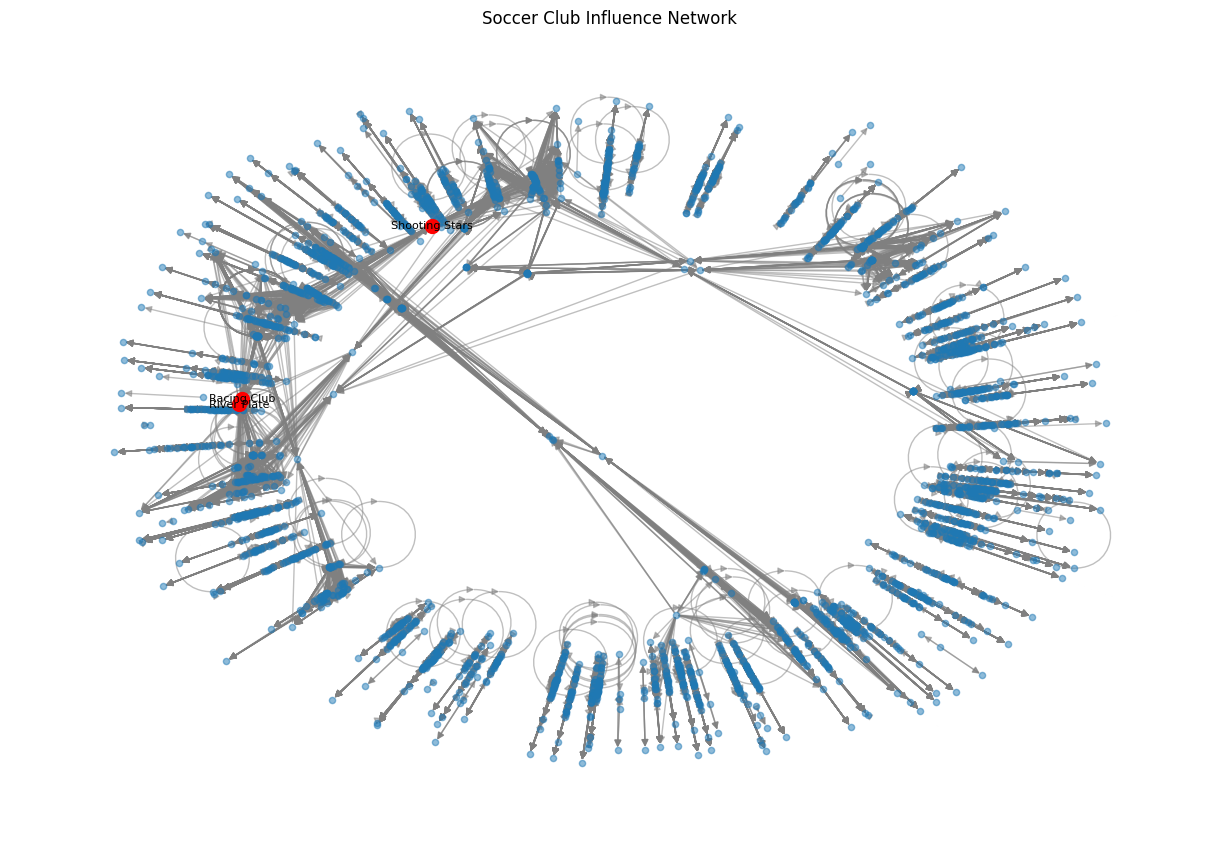

In [16]:
degree_centrality = nx.degree_centrality(G)
page_rank = nx.pagerank(G)
betweenness_centrality = nx.betweenness_centrality(G)


important_clubs = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
important_clubs = [(club, degree_centrality[club], page_rank[club], betweenness_centrality[club]) for club, _ in important_clubs]


important_df = pd.DataFrame(important_clubs, columns=['Club', 'Degree Centrality', 'PageRank', 'Betweenness Centrality'])
print(important_df)


plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_size=20, edge_color='gray', alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=[club for club, _, _, _ in important_clubs], node_color='red', node_size=100)
nx.draw_networkx_labels(G, pos, labels={club: club for club, _, _, _ in important_clubs}, font_size=8)
plt.title("Soccer Club Influence Network")
plt.show()